# clean & Visualizing Forest Fire Dataset

## Dataset Infarmation

The Forest Fires dataset from the UCI Machine Learning Repository is a multivariate dataset aimed at predicting the burned area of forest fires in the northeast region of Portugal. This dataset was donated on February 28, 2008, and is part of the Climate and Environment subject area. The task involves using meteorological and other data to predict the burned area of forest fires, making it a challenging regression problem.

To work with this dataset, one can use the ucimlrepo Python package to fetch the dataset and access its features and targets. The code snippet provided demonstrates how to install the package and fetch the Forest Fires dataset, as well as how to access the data and metadata.

In [26]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from ucimlrepo import fetch_ucirepo 

%matplotlib inline

In [27]:
forest_fires = fetch_ucirepo(id=162) 

x = forest_fires.data.features
y = forest_fires.data.targets

df = x
df['target'] = y

## Checking & Analyzing Dataset

In [28]:
df

X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain  target
0    7  5   mar  fri  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0    0.00
1    7  4   oct  tue  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0    0.00
2    7  4   oct  sat  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0    0.00
3    8  6   mar  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2    0.00
4    8  6   mar  sun  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0    0.00
..  .. ..   ...  ...   ...    ...    ...   ...   ...  ..   ...   ...     ...
512  4  3   aug  sun  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0    6.44
513  2  4   aug  sun  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0   54.29
514  7  4   aug  sun  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0   11.16
515  1  4   aug  sat  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0    0.00
516  6  3   nov  tue  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0    0.00

[517 rows x 13 columns]

In [29]:
df.dtypes

X           int64
Y           int64
month      object
day        object
FFMC      float64
DMC       float64
DC        float64
ISI       float64
temp      float64
RH          int64
wind      float64
rain      float64
target    float64
dtype: object

In [30]:
df.nunique()

X           9
Y           7
month      12
day         7
FFMC      106
DMC       215
DC        219
ISI       119
temp      192
RH         75
wind       21
rain        7
target    251
dtype: int64

In [31]:
df.isna().sum()

X         0
Y         0
month     0
day       0
FFMC      0
DMC       0
DC        0
ISI       0
temp      0
RH        0
wind      0
rain      0
target    0
dtype: int64

In [32]:
df.describe()

X           Y        FFMC         DMC          DC         ISI  \
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   
mean     4.669246    4.299807   90.644681  110.872340  547.940039    9.021663   
std      2.313778    1.229900    5.520111   64.046482  248.066192    4.559477   
min      1.000000    2.000000   18.700000    1.100000    7.900000    0.000000   
25%      3.000000    4.000000   90.200000   68.600000  437.700000    6.500000   
50%      4.000000    4.000000   91.600000  108.300000  664.200000    8.400000   
75%      7.000000    5.000000   92.900000  142.400000  713.900000   10.800000   
max      9.000000    9.000000   96.200000  291.300000  860.600000   56.100000   

             temp          RH        wind        rain       target  
count  517.000000  517.000000  517.000000  517.000000   517.000000  
mean    18.889168   44.288201    4.017602    0.021663    12.847292  
std      5.806625   16.317469    1.791653    0.295959    63.655818  
min      2.200000   15.000000    0.400000    0.000000     0.000000  
25%     15.500000   33.000000    2.700000    0.000000     0.000000  
50%     19.300000   42.000000    4.000000    0.000000     0.520000  
75%     22.800000   53.000000    4.900000    0.000000     6.570000  
max     33.300000  100.000000    9.400000    6.400000  1090.840000

## Find Pair Relationship

array([[<Axes: title={'center': 'X'}>, <Axes: title={'center': 'Y'}>,
        <Axes: title={'center': 'FFMC'}>],
       [<Axes: title={'center': 'DMC'}>, <Axes: title={'center': 'DC'}>,
        <Axes: title={'center': 'ISI'}>],
       [<Axes: title={'center': 'temp'}>, <Axes: title={'center': 'RH'}>,
        <Axes: title={'center': 'wind'}>],
       [<Axes: title={'center': 'rain'}>,
        <Axes: title={'center': 'target'}>, <Axes: >]], dtype=object)

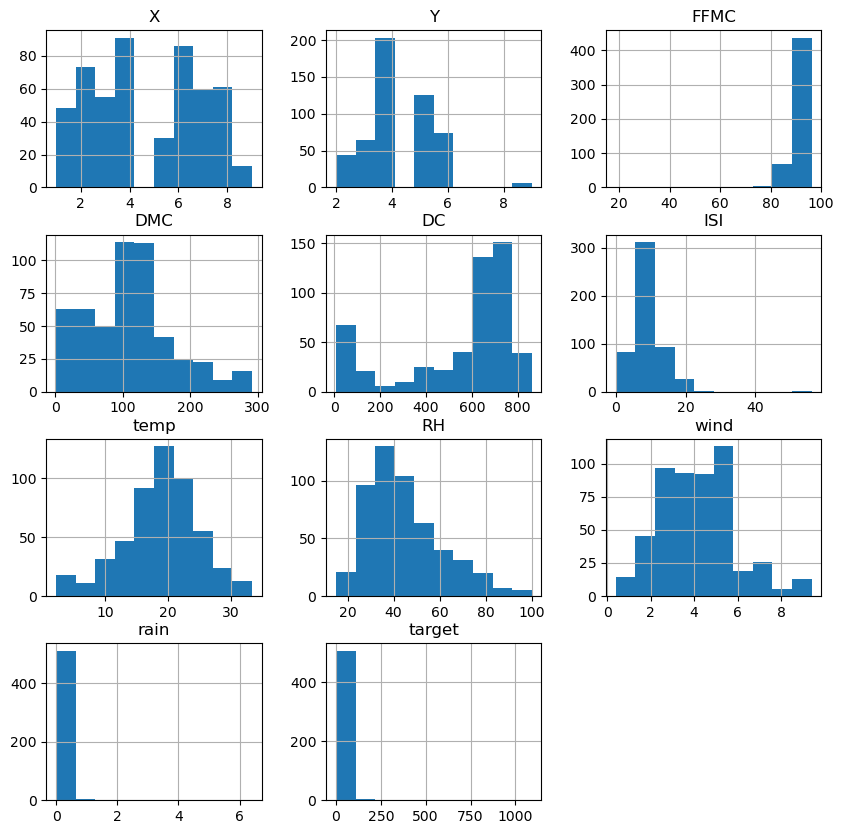

In [33]:
df.hist(figsize=(10, 10), )

c:\Users\Mr\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


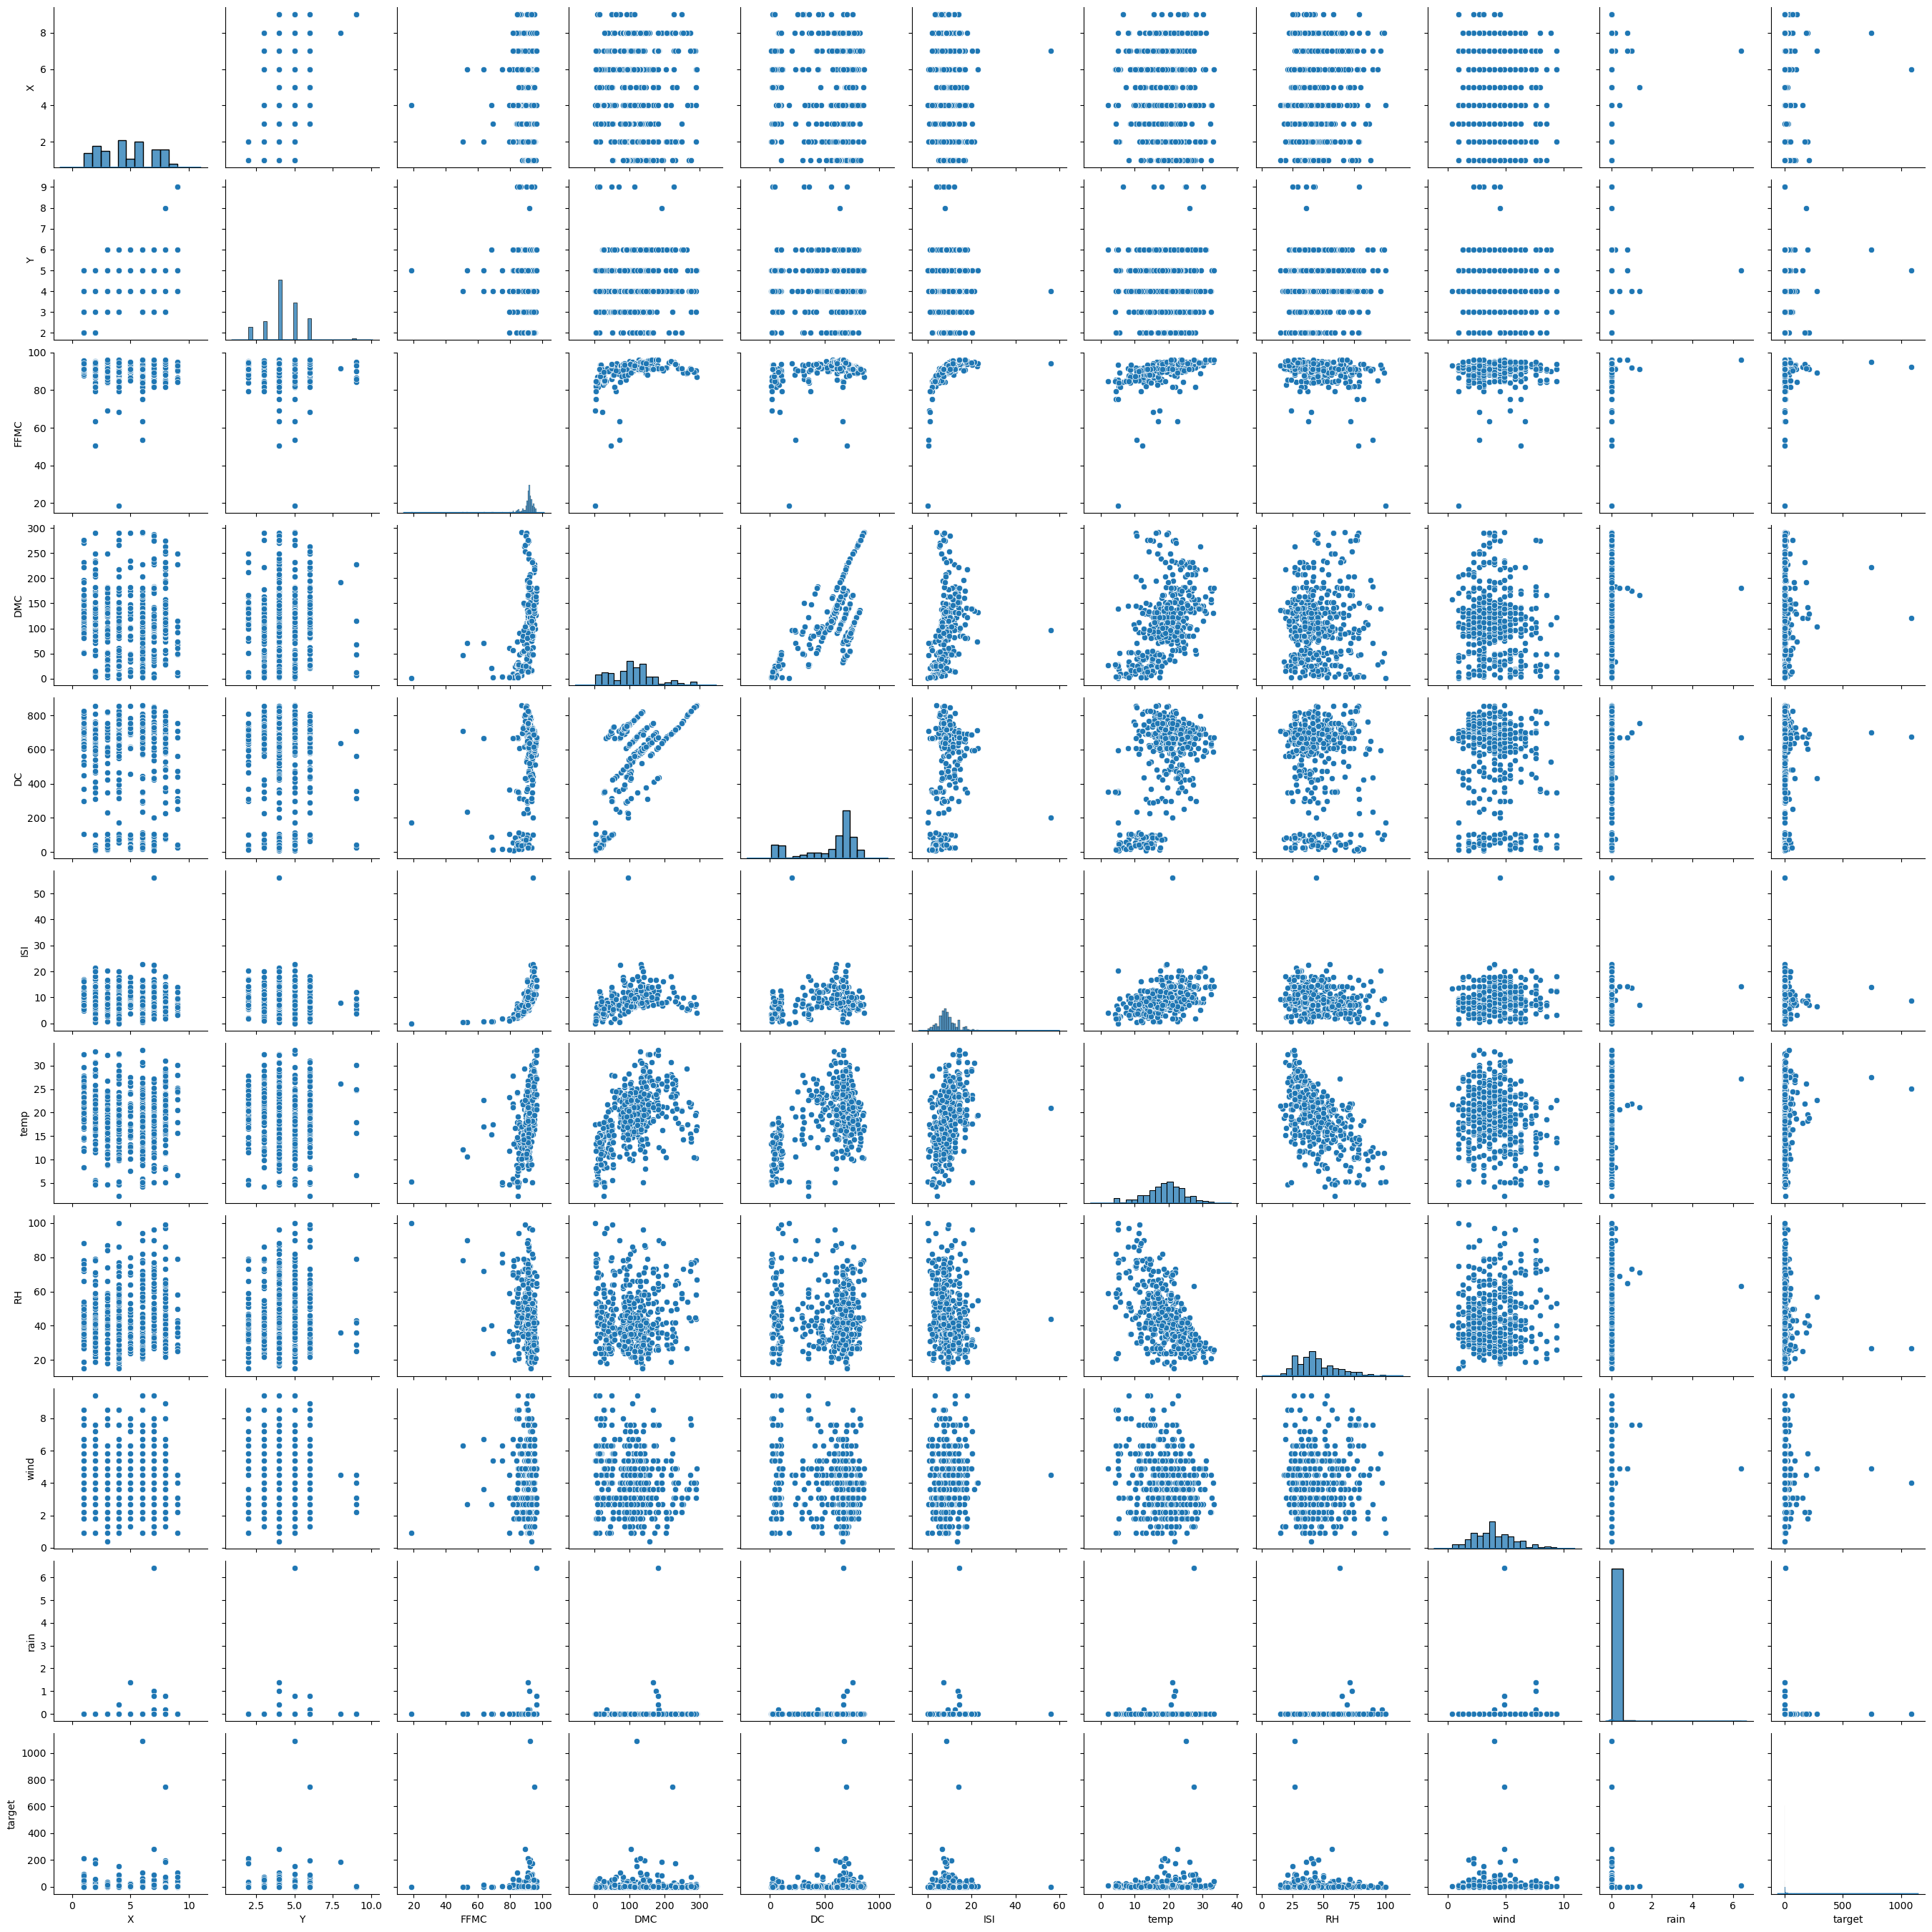

In [34]:
g = sns.pairplot(
    data=df,
)

g.map_diag(sns.kdeplot)

In [35]:
df['log_target'] = np.log10(df['target'] + 1)

In [36]:
df

X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain  target  \
0    7  5   mar  fri  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0    0.00   
1    7  4   oct  tue  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0    0.00   
2    7  4   oct  sat  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0    0.00   
3    8  6   mar  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2    0.00   
4    8  6   mar  sun  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0    0.00   
..  .. ..   ...  ...   ...    ...    ...   ...   ...  ..   ...   ...     ...   
512  4  3   aug  sun  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0    6.44   
513  2  4   aug  sun  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0   54.29   
514  7  4   aug  sun  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0   11.16   
515  1  4   aug  sat  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0    0.00   
516  6  3   nov  tue  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0    0.00   

     log_target  
0      0.000000  
1      0.000000  
2      0.000000  
3      0.000000  
4      0.000000  
..          ...  
512    0.871573  
513    1.742647  
514    1.084934  
515    0.000000  
516    0.000000  

[517 rows x 14 columns]

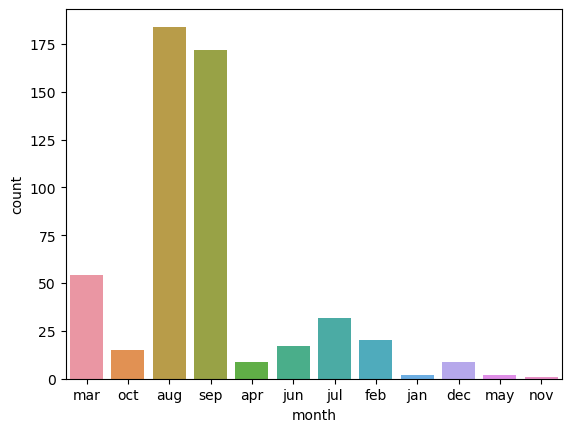

In [37]:
g = sns.countplot( x=df['month'])

In [38]:
df_numeric = df.select_dtypes(include=[np.number])
df_numeric.corr()

X         Y      FFMC       DMC        DC       ISI  \
X           1.000000  0.539548 -0.021039 -0.048384 -0.085916  0.006210   
Y           0.539548  1.000000 -0.046308  0.007782 -0.101178 -0.024488   
FFMC       -0.021039 -0.046308  1.000000  0.382619  0.330512  0.531805   
DMC        -0.048384  0.007782  0.382619  1.000000  0.682192  0.305128   
DC         -0.085916 -0.101178  0.330512  0.682192  1.000000  0.229154   
ISI         0.006210 -0.024488  0.531805  0.305128  0.229154  1.000000   
temp       -0.051258 -0.024103  0.431532  0.469594  0.496208  0.394287   
RH          0.085223  0.062221 -0.300995  0.073795 -0.039192 -0.132517   
wind        0.018798 -0.020341 -0.028485 -0.105342 -0.203466  0.106826   
rain        0.065387  0.033234  0.056702  0.074790  0.035861  0.067668   
target      0.063385  0.044873  0.040122  0.072994  0.049383  0.008258   
log_target  0.061995  0.038838  0.046799  0.067153  0.066360 -0.010347   

                temp        RH      wind      rain    target  log_target  
X          -0.051258  0.085223  0.018798  0.065387  0.063385    0.061995  
Y          -0.024103  0.062221 -0.020341  0.033234  0.044873    0.038838  
FFMC        0.431532 -0.300995 -0.028485  0.056702  0.040122    0.046799  
DMC         0.469594  0.073795 -0.105342  0.074790  0.072994    0.067153  
DC          0.496208 -0.039192 -0.203466  0.035861  0.049383    0.066360  
ISI         0.394287 -0.132517  0.106826  0.067668  0.008258   -0.010347  
temp        1.000000 -0.527390 -0.227116  0.069491  0.097844    0.053487  
RH         -0.527390  1.000000  0.069410  0.099751 -0.075519   -0.053662  
wind       -0.227116  0.069410  1.000000  0.061119  0.012317    0.066973  
rain        0.069491  0.099751  0.061119  1.000000 -0.007366    0.023311  
target      0.097844 -0.075519  0.012317 -0.007366  1.000000    0.524134  
log_target  0.053487 -0.053662  0.066973  0.023311  0.524134    1.000000

<Axes: >

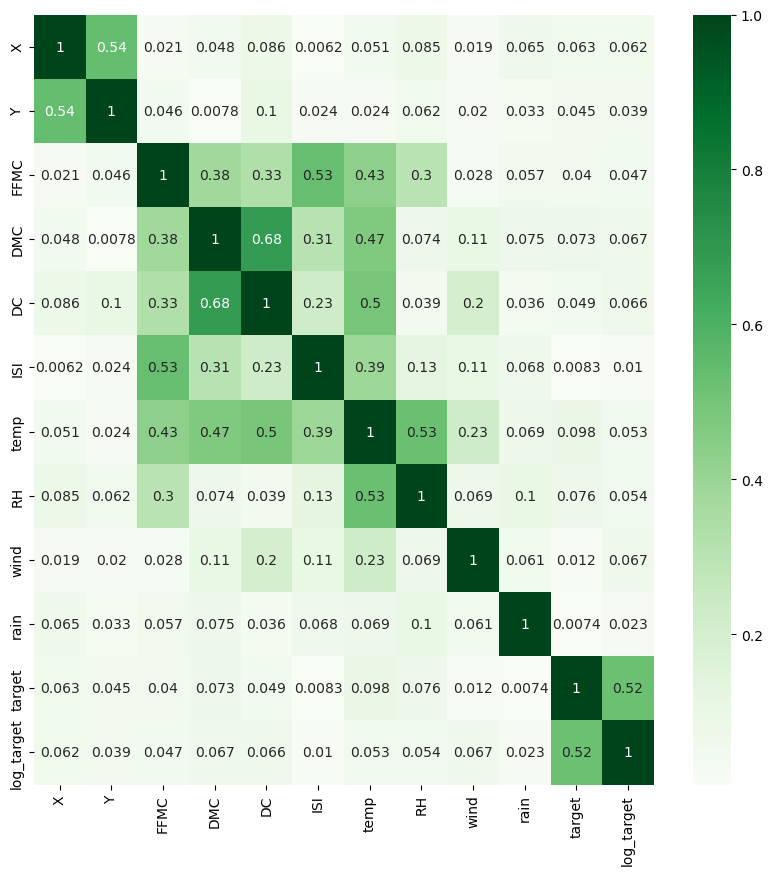

In [39]:
plt.figure(figsize=(10, 10))

sns.heatmap(
    abs(df_numeric.corr(method = 'pearson')), cmap="Greens", annot=True,
)

<Axes: >

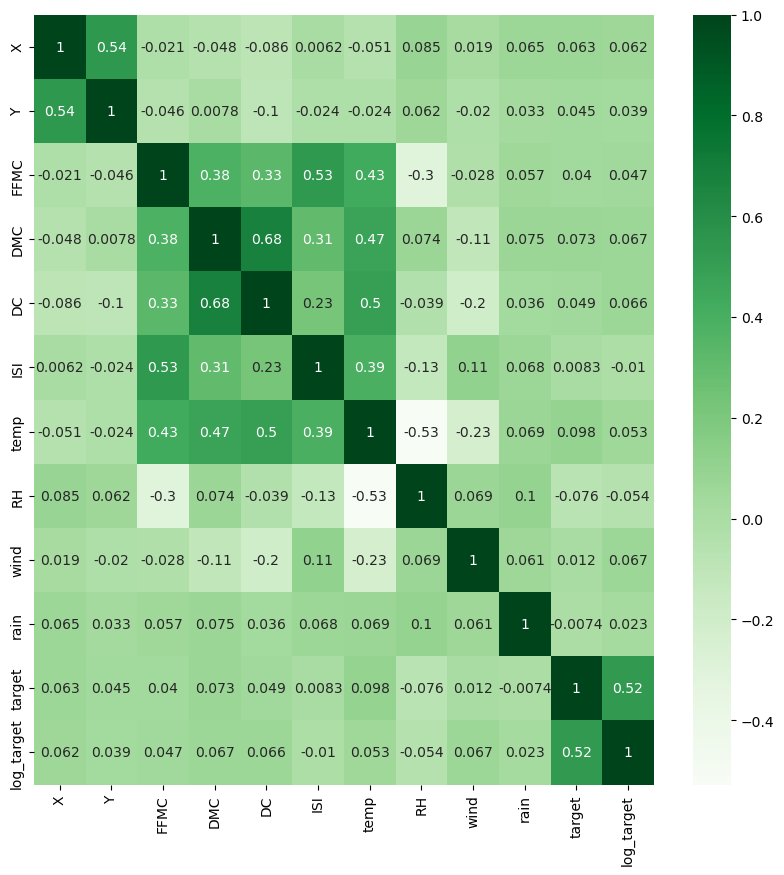

In [40]:
plt.figure(figsize=(10, 10))

sns.heatmap(
    (df_numeric.corr(method = 'pearson')), cmap="Greens", annot=True,
)

In [41]:
df_numeric.corr(method='pearson')

X         Y      FFMC       DMC        DC       ISI  \
X           1.000000  0.539548 -0.021039 -0.048384 -0.085916  0.006210   
Y           0.539548  1.000000 -0.046308  0.007782 -0.101178 -0.024488   
FFMC       -0.021039 -0.046308  1.000000  0.382619  0.330512  0.531805   
DMC        -0.048384  0.007782  0.382619  1.000000  0.682192  0.305128   
DC         -0.085916 -0.101178  0.330512  0.682192  1.000000  0.229154   
ISI         0.006210 -0.024488  0.531805  0.305128  0.229154  1.000000   
temp       -0.051258 -0.024103  0.431532  0.469594  0.496208  0.394287   
RH          0.085223  0.062221 -0.300995  0.073795 -0.039192 -0.132517   
wind        0.018798 -0.020341 -0.028485 -0.105342 -0.203466  0.106826   
rain        0.065387  0.033234  0.056702  0.074790  0.035861  0.067668   
target      0.063385  0.044873  0.040122  0.072994  0.049383  0.008258   
log_target  0.061995  0.038838  0.046799  0.067153  0.066360 -0.010347   

                temp        RH      wind      rain    target  log_target  
X          -0.051258  0.085223  0.018798  0.065387  0.063385    0.061995  
Y          -0.024103  0.062221 -0.020341  0.033234  0.044873    0.038838  
FFMC        0.431532 -0.300995 -0.028485  0.056702  0.040122    0.046799  
DMC         0.469594  0.073795 -0.105342  0.074790  0.072994    0.067153  
DC          0.496208 -0.039192 -0.203466  0.035861  0.049383    0.066360  
ISI         0.394287 -0.132517  0.106826  0.067668  0.008258   -0.010347  
temp        1.000000 -0.527390 -0.227116  0.069491  0.097844    0.053487  
RH         -0.527390  1.000000  0.069410  0.099751 -0.075519   -0.053662  
wind       -0.227116  0.069410  1.000000  0.061119  0.012317    0.066973  
rain        0.069491  0.099751  0.061119  1.000000 -0.007366    0.023311  
target      0.097844 -0.075519  0.012317 -0.007366  1.000000    0.524134  
log_target  0.053487 -0.053662  0.066973  0.023311  0.524134    1.000000

c:\Users\Mr\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


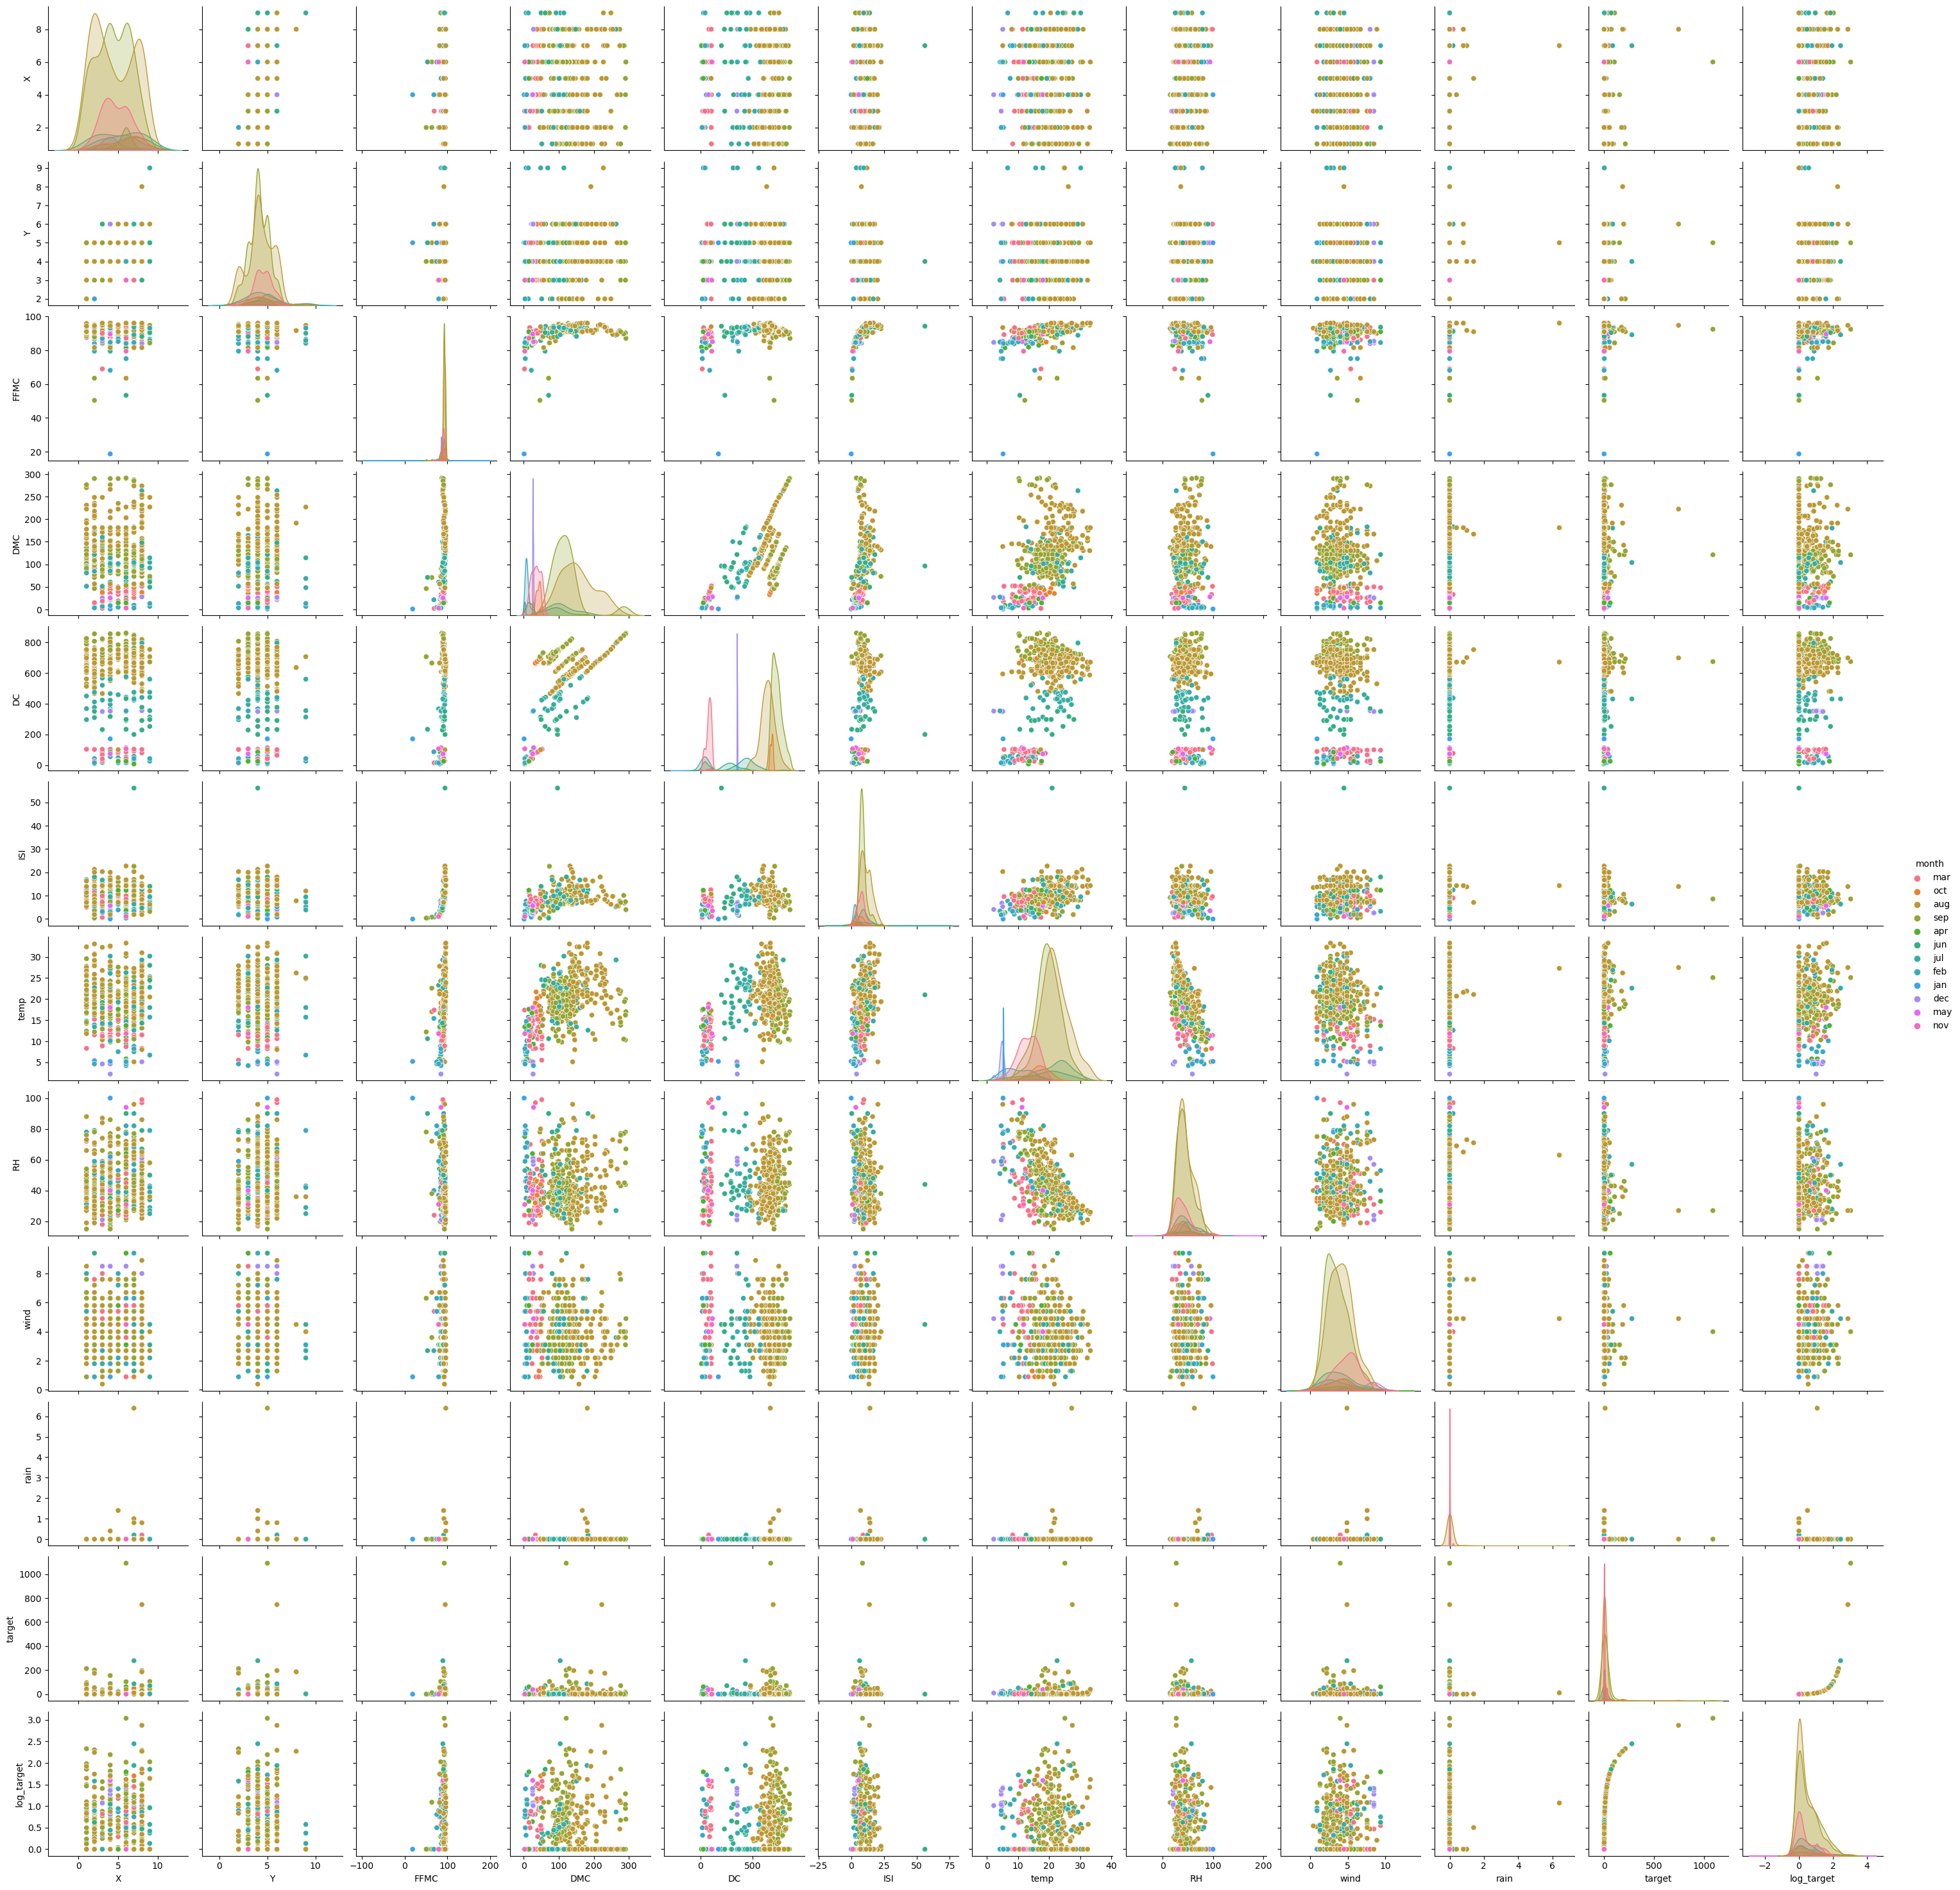

In [42]:
sns.pairplot(
    data=df,
    hue='month'
    
)

In [43]:
df['month'] = df['month'].replace(
    {
        'jan': 10, 'feb':11, 'mar': 12, 'apr':4, 'may': 5, 'jun' :6,  'jul': 1, 'aug': 2, 'sep': 3, 'oct': 7, 'nov':8, 'dec': 9
    }
)

c:\Users\Mr\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


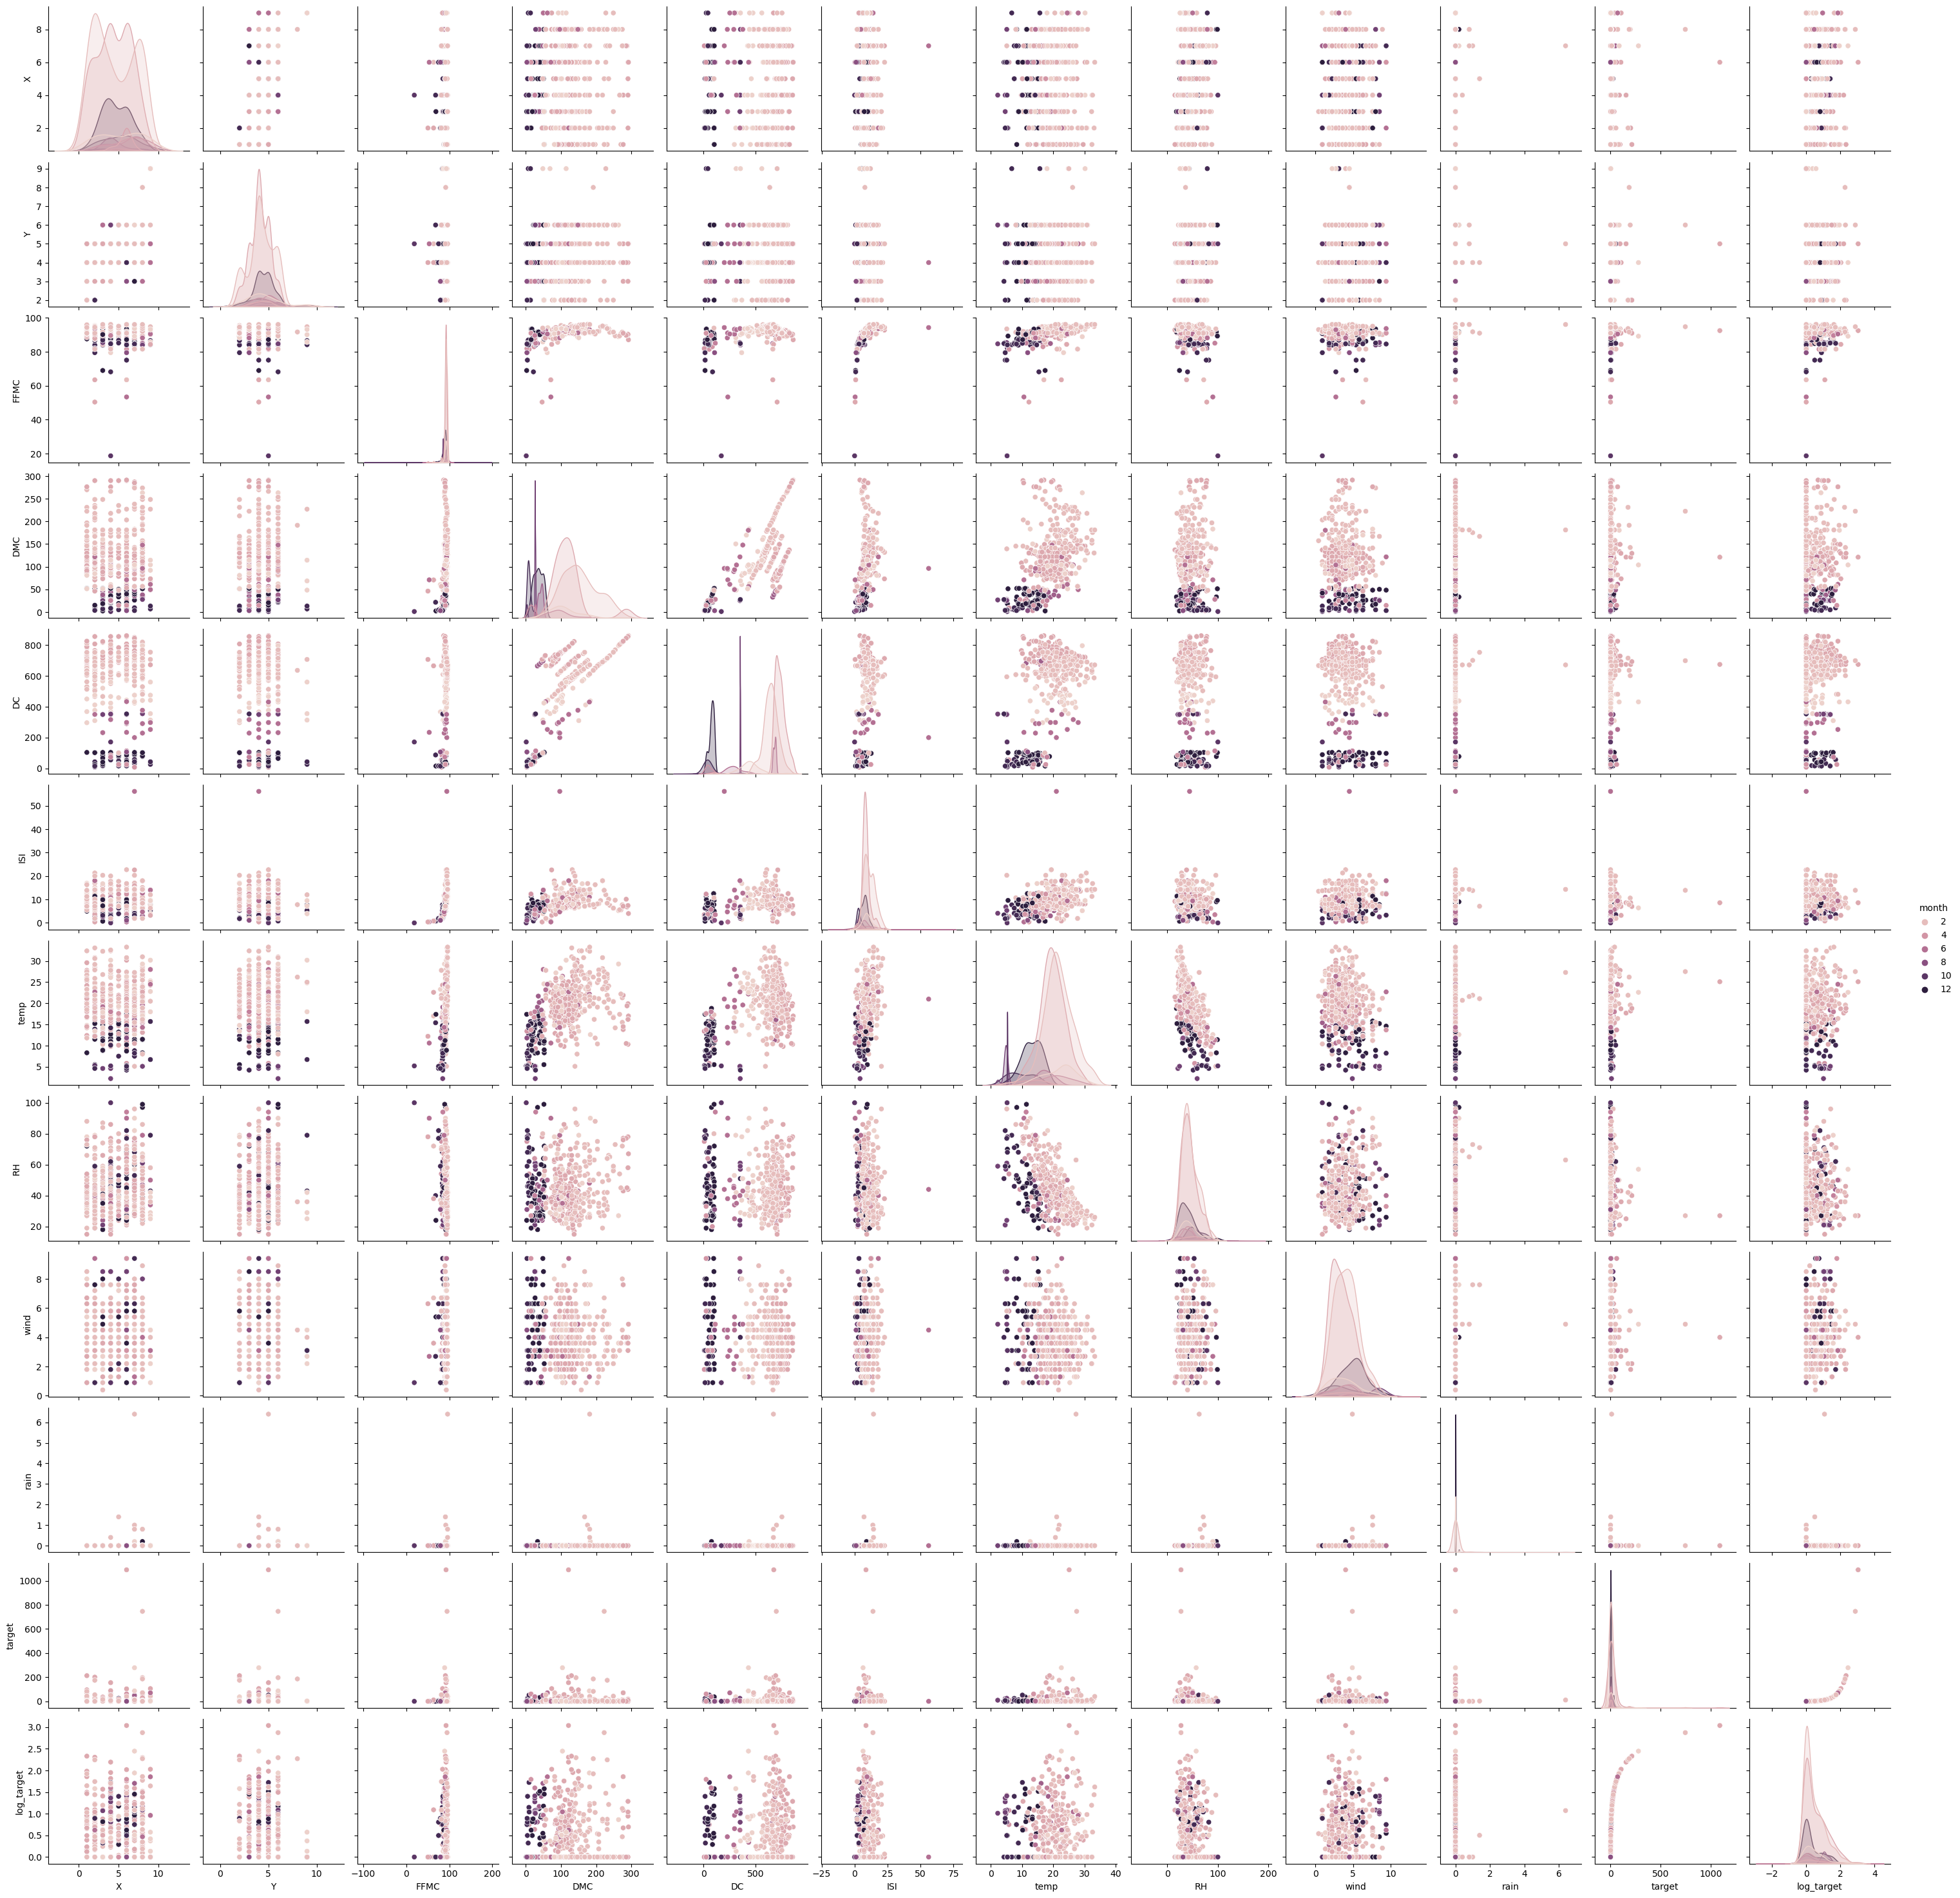

In [44]:
sns.pairplot(
    data=df,
    hue='month'
    
)

In [45]:
df_numeric = df.select_dtypes(include=[np.number])
data_corr = abs(df_numeric.corr(method="pearson")['target']).sort_values().drop(['target', 'log_target'], axis=0)

<Axes: >

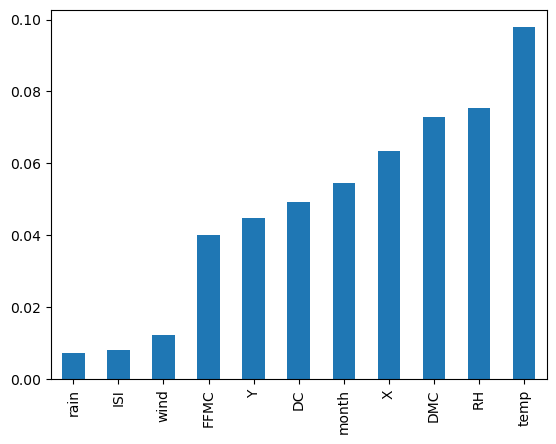

In [46]:
data_corr.plot.bar()

In [47]:
df

X  Y  month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain  target  \
0    7  5     12  fri  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0    0.00   
1    7  4      7  tue  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0    0.00   
2    7  4      7  sat  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0    0.00   
3    8  6     12  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2    0.00   
4    8  6     12  sun  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0    0.00   
..  .. ..    ...  ...   ...    ...    ...   ...   ...  ..   ...   ...     ...   
512  4  3      2  sun  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0    6.44   
513  2  4      2  sun  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0   54.29   
514  7  4      2  sun  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0   11.16   
515  1  4      2  sat  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0    0.00   
516  6  3      8  tue  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0    0.00   

     log_target  
0      0.000000  
1      0.000000  
2      0.000000  
3      0.000000  
4      0.000000  
..          ...  
512    0.871573  
513    1.742647  
514    1.084934  
515    0.000000  
516    0.000000  

[517 rows x 14 columns]

In [48]:
df = df.drop('day', axis=1)

In [49]:
df

X  Y  month  FFMC    DMC     DC   ISI  temp  RH  wind  rain  target  \
0    7  5     12  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0    0.00   
1    7  4      7  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0    0.00   
2    7  4      7  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0    0.00   
3    8  6     12  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2    0.00   
4    8  6     12  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0    0.00   
..  .. ..    ...   ...    ...    ...   ...   ...  ..   ...   ...     ...   
512  4  3      2  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0    6.44   
513  2  4      2  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0   54.29   
514  7  4      2  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0   11.16   
515  1  4      2  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0    0.00   
516  6  3      8  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0    0.00   

     log_target  
0      0.000000  
1      0.000000  
2      0.000000  
3      0.000000  
4      0.000000  
..          ...  
512    0.871573  
513    1.742647  
514    1.084934  
515    0.000000  
516    0.000000  

[517 rows x 13 columns]

In [50]:
pd.DataFrame(data=[df.skew(), df.kurtosis()], index = ['skewness', 'kurtosis'])

X         Y     month       FFMC       DMC        DC  \
skewness  0.036246  0.417296  1.488166  -6.575606  0.547498 -1.100445   
kurtosis -1.172331  1.420553  0.655436  67.066041  0.204822 -0.245244   

                ISI      temp        RH      wind        rain      target  \
skewness   2.536325 -0.331172  0.862904  0.571001   19.816344   12.846934   
kurtosis  21.458037  0.136166  0.438183  0.054324  421.295964  194.140721   

          log_target  
skewness    1.217838  
kurtosis    0.945668